In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv("Admission_Predict.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
dataset['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

<AxesSubplot:ylabel='Density'>

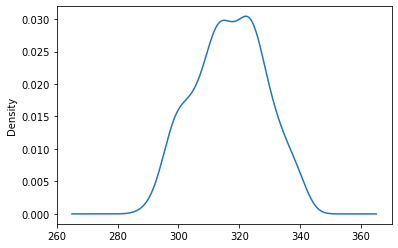

In [8]:
dataset['GRE Score'].plot.kde()

In [9]:
dataset.drop(labels='Serial No.',axis=1,inplace= True)

In [10]:
y = dataset.iloc[:,-1]
X = dataset.iloc[:,:-1]

<AxesSubplot:>

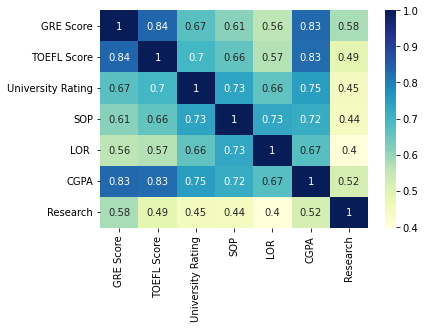

In [11]:
sns.heatmap(dataset.iloc[:,:-1].corr(),annot=True,cmap='YlGnBu')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
247,311,104,2,2.5,3.5,8.48,0
110,305,108,5,3.0,3.0,8.48,0
16,317,107,3,4.0,3.0,8.70,0
66,327,114,3,3.0,3.0,9.02,0
153,324,105,3,3.0,4.0,8.75,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:2]=sc.fit_transform(X_train.iloc[:,:2])


In [15]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
247,-0.518327,-0.573999,2,2.5,3.5,8.48,0
110,-1.049944,0.087036,5,3.0,3.0,8.48,0
16,0.013290,-0.078223,3,4.0,3.0,8.70,0
66,0.899319,1.078590,3,3.0,3.0,9.02,0
153,0.633511,-0.408740,3,3.0,4.0,8.75,0
...,...,...,...,...,...,...,...
71,1.696746,0.748072,5,5.0,5.0,9.76,1
106,1.076525,0.582813,4,4.5,4.5,9.18,1
270,-0.961342,-0.408740,2,2.5,3.0,8.22,1
348,-1.315753,-1.400294,1,2.0,2.0,7.25,0


In [16]:
X_test.iloc[:,:2]=sc.fit_transform(X_test.iloc[:,:2])

##Fitting Linear Regressor 

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import r2_score
predictions = model.predict(X_test)

In [19]:
r2_score(y_test,predictions)

0.8143025191084213

##Fitting Support Vector Regressor Model

In [20]:
from sklearn.svm import SVR
model2 = SVR()
model2.fit(X_train,y_train)

SVR()

In [21]:
pred = model2.predict(X_test)

In [22]:
r2_score(y_test,pred)

0.7600506769146556

##Fitting RandomForest Regressor Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100)
model3.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
predic = model3.predict(X_test)

In [25]:
r2_score(y_test,predic)

0.8175076240596217

##Random Forest Regressor gives better result